## Assignment 1

### Your Full Name: Lim Ravy

### 1. Load Dataset

Tasks:
1. Load the dataset (data.txt) into a feature matrix $X$, and a target vector $y$

2. Split the dataset into train and test ($X_{train}$, $y_{train}$, $X_{test}$, $y_{test}$ ) using a 80-20 rule, using a random seed number of 0.

Useful funtions (optional):

1. numpy.loadtxt

2. sklearn.model_selection.train_test_split

In [41]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

filepath="/content/data.txt"
test_size= 0.2
random_state=0

data = np.loadtxt(filepath,delimiter=',')

# Separate features (X) and target (y)
X = data[:, :-1]  # All columns except the last one are features
y = data[:, -1]   # The last column is the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

print("Data loaded and split successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data loaded and split successfully.
X_train shape: (800, 3)
X_test shape: (200, 3)
y_train shape: (800,)
y_test shape: (200,)


### 2. Visualization

Tasks:

1. Create scatter plots between each input, and the target vector $y$

2. Comment on the relationship between each input and the target vector $y$

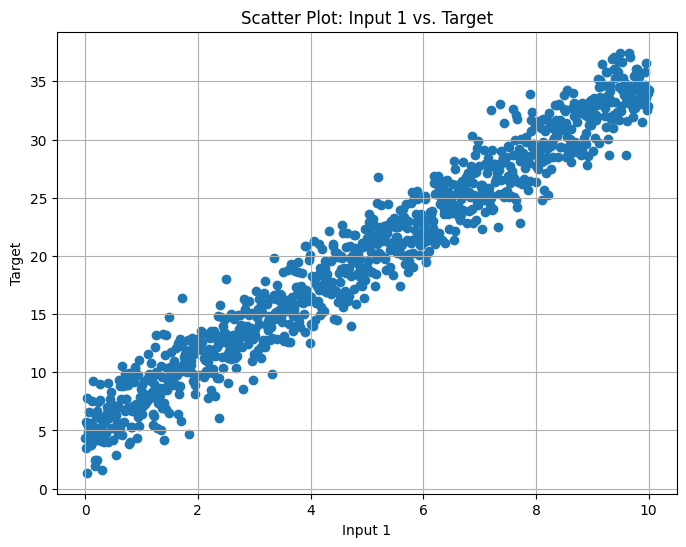

Correlation between Input 1 and Target: 0.9763
Strong relationship detected.
------------------------------


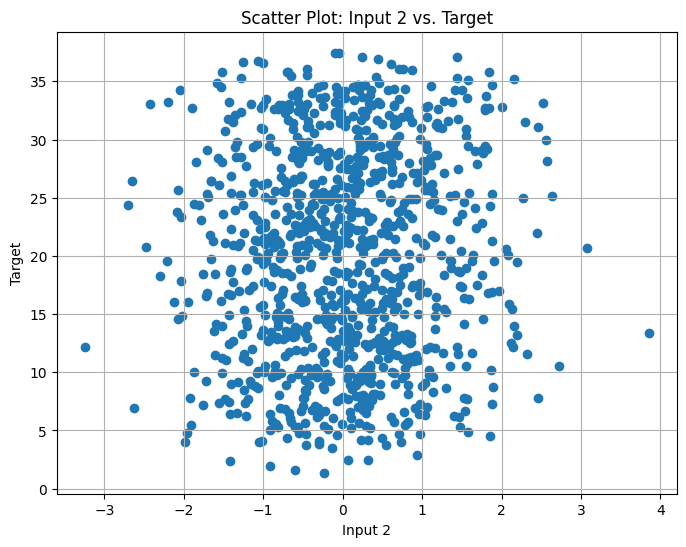

Correlation between Input 2 and Target: 0.0469
Weak or no linear relationship detected.
------------------------------


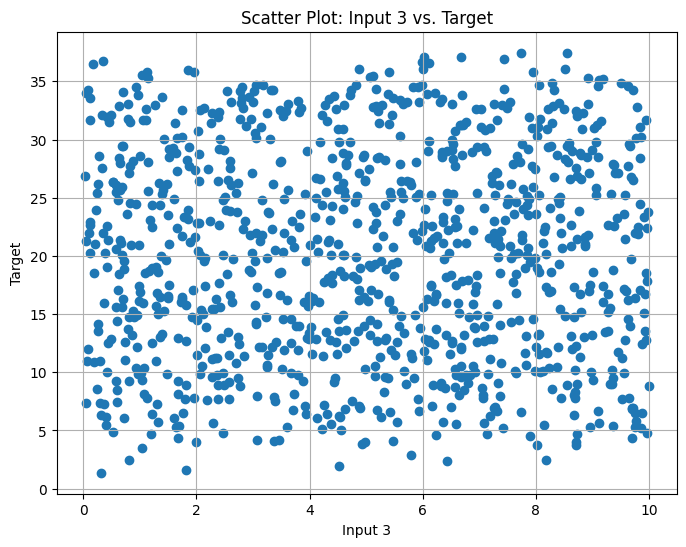

Correlation between Input 3 and Target: 0.0043
Weak or no linear relationship detected.
------------------------------


In [42]:
if X is not None:
  num_inputs = X.shape[1]

  # Create scatter plots
  for i in range(num_inputs):
      plt.figure(figsize=(8, 6))
      plt.scatter(X[:, i], y)
      plt.xlabel(f"Input {i+1}")
      plt.ylabel("Target")
      plt.title(f"Scatter Plot: Input {i+1} vs. Target")
      plt.grid(True)
      plt.show()

      # Comment on the relationship
      correlation = np.corrcoef(X[:, i], y)[0, 1]
      print(f"Correlation between Input {i+1} and Target: {correlation:.4f}")

      if abs(correlation) > 0.7:
          print("Strong relationship detected.")
      elif abs(correlation) >0.3:
          print("Moderate relationship detected.")
      else:
          print("Weak or no linear relationship detected.")
      print("-" * 30)
else:
    print("Data loading or splitting failed.")

### 3. Model Training with StatsModel

Tasks:

1. Using the training set to train the model using statsmodel package

2. Print out the summary results and identify the significant and insignificant inputs

3. Drop out the insignificant inputs if there are any, retrain the model, and print the summary results

4. Comment what you understand by insignificant inputs.


Note: use different variable names for dropping the insignificant inputs:

Ex. $X^s_{train}$, $y^s_{train}$, $X^s_{test}$, $y^s_{test}$

In [43]:
# Add a constant (intercept) to the training data
X_train_const = sm.add_constant(X_train)

# Train the model using statsmodels
model = sm.OLS(y_train, X_train_const).fit()

# Print the summary results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     5552.
Date:                Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                        07:53:07   Log-Likelihood:                -1659.6
No. Observations:                 800   AIC:                             3327.
Df Residuals:                     796   BIC:                             3346.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7232      0.180     26.205      0.0

In [44]:
# Identify significant and insignificant inputs
p_values = model.pvalues[1:]  # Exclude the constant's p-value
significant_inputs = np.where(p_values < 0.05)[0]  # Assuming 0.05 significance level
insignificant_inputs = np.where(p_values >= 0.05)[0]

print("\nSignificant Inputs (indices):", significant_inputs)
print("Insignificant Inputs (indices):", insignificant_inputs)


Significant Inputs (indices): [0 1]
Insignificant Inputs (indices): [2]


In [45]:
if len(insignificant_inputs) > 0:
      significant_columns = np.concatenate(([0], significant_inputs + 1)) #add constant index back.
      Xs_train_const = X_train_const[:, significant_columns]
      Xs_test = X_test[:, significant_inputs]
      Xs_test_const = sm.add_constant(Xs_test)

      model_reduced = sm.OLS(y_train, Xs_train_const).fit()
      print("\nModel Summary after dropping insignificant inputs:")
      print(model_reduced.summary())
else:
      print("\nNo insignificant inputs found. No model retraining needed.")

      print("\nUnderstanding Insignificant Inputs:")
      print("Insignificant inputs, as indicated by their high p-values (typically > 0.05), suggest that they do not have a statistically significant linear relationship with the target variable, given the other inputs in the model. In other words, their coefficients are not reliably different from zero. Removing them can simplify the model and potentially improve its generalization performance by reducing noise. They contribute little to explaining the variance in the target variable.")


Model Summary after dropping insignificant inputs:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     8321.
Date:                Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                        07:53:07   Log-Likelihood:                -1660.5
No. Observations:                 800   AIC:                             3327.
Df Residuals:                     797   BIC:                             3341.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


In [46]:
#TODO
# Comment what you understand by insignificant inputs.

# Note: use different variable names for dropping the insignificant inputs:

# Ex.  𝑋𝑠𝑡𝑟𝑎𝑖𝑛 ,  𝑦𝑠𝑡𝑟𝑎𝑖𝑛 ,  𝑋𝑠𝑡𝑒𝑠𝑡 ,  𝑦𝑠𝑡𝑒𝑠𝑡

### 4. Model Training with Scikit-Learn

Tasks:

0. Using the data sets after dropping the insignificant inputs. Ex. $X^s_{train}$, $y^s_{train}$, $X^s_{test}$, $y^s_{test}$

1. Using the training set to train the model (LinearRegression)

2. Compute the R-squared score on the train test.

3. Predict on the test set and compute  the R-squared score

4. Compare the R-squared scores of the train and test sets, and comment in terms of overfitting, underfitting, and good fit.

Useful funtion (optional):

1. sklearn.metrics.r2_score



In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Use scikit-learn LinearRegression
model_sklearn = LinearRegression()
model_sklearn.fit(Xs_train_const[:, 1:], y_train) #slicing to remove the constant column for sklearn.

# Predict on the training set
y_train_pred = model_sklearn.predict(Xs_train_const[:, 1:])

# Predict on the test set
y_test_pred = model_sklearn.predict(Xs_test)

# Compute R-squared scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"\nR-squared score on the training set: {r2_train:.4f}")
print(f"R-squared score on the test set: {r2_test:.4f}")


# Compare R-squared scores and comment
if r2_train > r2_test and (r2_train - r2_test) > 0.1: #setting a threshold to detect overfitting.
    print("\nOverfitting: The model performs significantly better on the training data than on the test data.")
elif r2_train < r2_test:
    print("\nUnderfitting: The model performs poorly on both the training and test data.")
else:
    print("\nGood fit: The model performs well on both the training and test data, indicating good generalization.")



R-squared score on the training set: 0.9543
R-squared score on the test set: 0.9488

Good fit: The model performs well on both the training and test data, indicating good generalization.


### 5. Model Deployment

Tasks:

1. Deploy the trained scikitlearn model with Gradio. The app should take input(s), predict, and return output.

2. Screenshot your app with some inputs and output.

In [57]:
## YOUR CODES need to screenshot app
# !pip install gradio
import gradio as gr

# Gradio Interface
input_components = [gr.Number(label=f"Input {i+1}") for i in significant_inputs]

def predict(*inputs):
  input_array = np.array(inputs).reshape(1, -1)
  prediction = model_sklearn.predict(input_array)[0]
  return prediction

iface = gr.Interface(
            fn=predict,
            inputs=input_components,
            outputs=gr.Number(label="Prediction"),
            title="Linear Regression Prediction App",
            description="Enter the input values to get the predicted target value."
)
iface.launch()



Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://825f03eceec950e2c3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
